In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.20/04


In [2]:
##### setting file path #####

sig_rootpath = "/data/Chen-Wang/gghh_highPT_250/Events/run_01_decayed_1/tag_1_delphes_events.root"
sig_file = uproot.open(sig_rootpath)

In [3]:
sig_Fjet_Eta = sig_file["Delphes;1"]["FatJet.Eta"].array()
sig_Fjet_Phi = sig_file["Delphes;1"]["FatJet.Phi"].array()
sig_Fjet_Particles = sig_file["Delphes;1"]["FatJet.Particles"].array()

event_num = 56

print(sig_Fjet_Eta[event_num])
print(sig_Fjet_Phi[event_num])

print(sig_Fjet_Particles[event_num])

[0.22748189 0.29754642]
[ 0.5606939 -2.4959576]
[[751, 1355, 1352, 1354, 1086, 1143, 1015, 1359, 937, 1482, 1434, 978, 1260, 1362, 1146, 1358, 979, 1485, 977, 1147, 1362, 1435, 759, 979, 1363, 1439, 1440, 1467, 1468, 759, 1469, 1439, 1363, 1148, 1150, 1436, 1437, 1438, 1484, 1468, 1440], [1181, 1180, 1444, 1157, 1156, 1008, 1261, 1262, 1445, 1151, 1367, 1366, 984, 981, 1263, 983, 983, 779, 921, 926, 928, 1077, 843, 1073, 1317, 1316, 1421, 1448, 1186, 929, 1185, 779, 1238, 1077, 924, 624, 1422, 784, 921, 1313, 927, 1072, 619, 621, 622, 929, 922, 782, 920, 787, 1070, 1007, 1072, 620, 616, 1235, 1236, 1068, 1067, 1312, 619, 1071, 1311]]


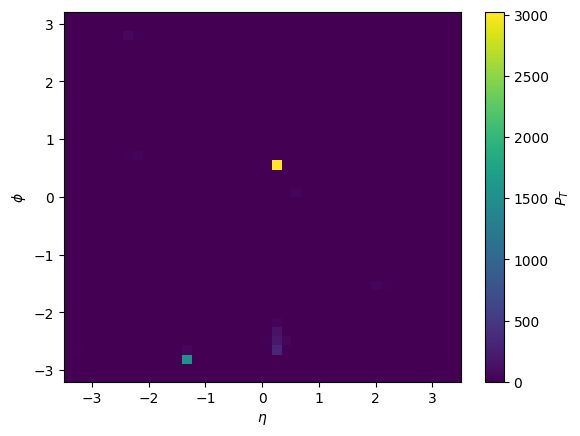

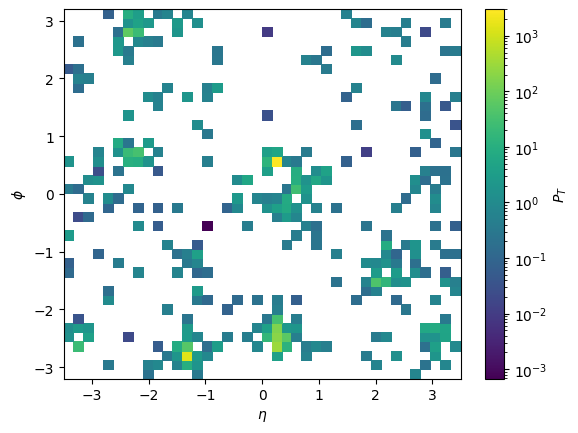

In [4]:
##### set signal event content #####

event_num = 56
grid_num = 40    # means n^2 points
events = [sig_file["Delphes;1"]["Particle.Status"].array()[event_num],
        sig_file["Delphes;1"]["Particle.PT"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Eta"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Phi"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Mass"].array()[event_num],
        ]

situation = 1*(events[0]==1)+1*(events[0]==2)
where_finalstate = np.where(situation==1)

#print(where_finalstate)
final_Eta = events[2][where_finalstate]
final_Phi = events[3][where_finalstate]
final_PT = events[1][where_finalstate]

'''
final_Eta = np.append(final_Eta, 3)
final_Phi = np.append(final_Phi, -2)
final_PT = np.append(final_PT, 3000)
'''

##### Draw the final state PT figure #####

xedges = np.linspace(-3.5, 3.5, grid_num+1)        # Eta limit
yedges = np.linspace(-3.2, 3.2, grid_num+1)    # Phi limit
PT = np.zeros([grid_num,grid_num])

for Eta in range(grid_num):
    for Phi in range(grid_num):
        where1 = np.where((xedges[Eta]<final_Eta) & (final_Eta<xedges[Eta+1]) & (yedges[Phi]<final_Phi) & (final_Phi<yedges[Phi+1]))
        PT[Eta][Phi] = sum(final_PT[where1])

pcm = plt.pcolormesh(xedges, yedges, PT.T)
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()      

pcm = plt.pcolormesh(xedges, yedges, PT.T, norm=LogNorm())
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()

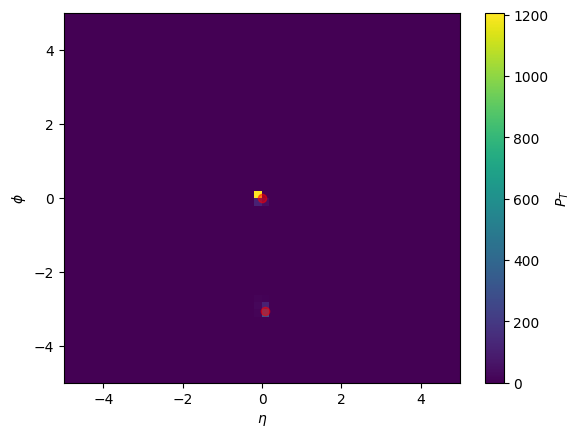

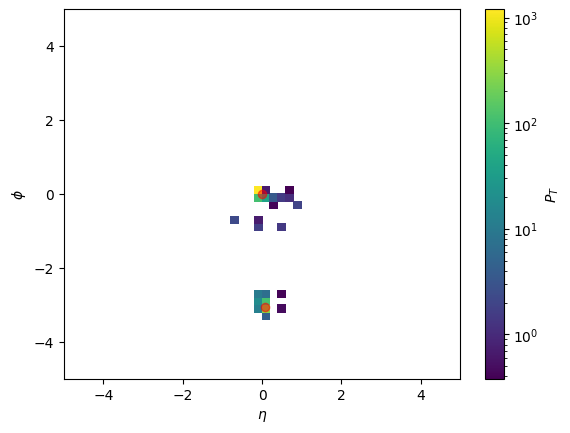

Fat jet momentum [798.06024 426.79712]


In [5]:
##### include data #####

event_num = 56
grid_num = 50    # means n^2 points
events = [sig_file["Delphes;1"]["Particle.Status"].array(),
        sig_file["Delphes;1"]["Particle.PT"].array(),
        sig_file["Delphes;1"]["Particle.Eta"].array(),
        sig_file["Delphes;1"]["Particle.Phi"].array(),
        sig_file["Delphes;1"]["FatJet.Particles"].array(),
        sig_file["Delphes;1"]["FatJet.Eta"].array(),
        sig_file["Delphes;1"]["FatJet.Phi"].array(),
        sig_file["Delphes;1"]["FatJet.PT"].array(),
        sig_file["Delphes;1"]["FatJet"].array()
        ]

##### reshape the signal data #####

events = np.expand_dims(events, axis=-1)
events = events.transpose((1,0,2))
events = np.squeeze(events,axis=(2,))

##### find jet particles #####

where_jet_particle = events[event_num][4][0]+events[event_num][4][1]
where_jet_particle = np.array(where_jet_particle)-1
particle_Eta = events[event_num][2][where_jet_particle] - events[event_num][5][0]
particle_Phi = events[event_num][3][where_jet_particle] - events[event_num][6][0]
particle_PT = events[event_num][1][where_jet_particle]

##### Draw the jet PT figure #####

xedges = np.linspace(-5, 5, grid_num+1)        # Eta limit
yedges = np.linspace(-5, 5, grid_num+1)    # Phi limit
PT = np.zeros([grid_num,grid_num])

for Eta in range(grid_num):
    for Phi in range(grid_num):
        where1 = np.where((xedges[Eta]<particle_Eta) & (particle_Eta<xedges[Eta+1]) & (yedges[Phi]<particle_Phi) & (particle_Phi<yedges[Phi+1]))
        PT[Eta][Phi] = sum(particle_PT[where1])

pcm = plt.pcolormesh(xedges, yedges, PT.T)
plt.scatter(events[event_num][5]-events[event_num][5][0], events[event_num][6]-events[event_num][6][0], c='r', alpha=0.5)
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()

pcm = plt.pcolormesh(xedges, yedges, PT.T, norm=LogNorm())
plt.scatter(events[event_num][5]-events[event_num][5][0], events[event_num][6]-events[event_num][6][0], c='r', alpha=0.5)
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()

print("Fat jet momentum", events[event_num][7])

In [6]:
##### select if Fat Jet>=2 #####

def Fat_Jet_selection(events):
    where1 = np.where(events[:,8]>=2)
    return events[where1]

##### define figure generator #####

def PT_generator(event):
    grid_num = 50    # means n^2 points
    where_jet_particle = event[4][0]+event[4][1]
    where_jet_particle = np.array(where_jet_particle)-1
    particle_Eta = event[2][where_jet_particle] - event[5][0]
    particle_Phi = event[3][where_jet_particle] - event[6][0]
    particle_PT = event[1][where_jet_particle]
    
    xedges = np.linspace(-5, 5, grid_num+1)        # Eta limit
    yedges = np.linspace(-5, 5, grid_num+1)    # Phi limit
    PT = np.zeros([grid_num,grid_num])
    
    for Eta in range(grid_num):
        for Phi in range(grid_num):
            where1 = np.where((xedges[Eta]<particle_Eta) & (particle_Eta<xedges[Eta+1]) & (yedges[Phi]<particle_Phi) & (particle_Phi<yedges[Phi+1]))
            PT[Eta][Phi] = sum(particle_PT[where1])
            
    return PT.T    ### after transpose: X=eta Y=phi

There are 8670 signal events survive with originally 10000 events.


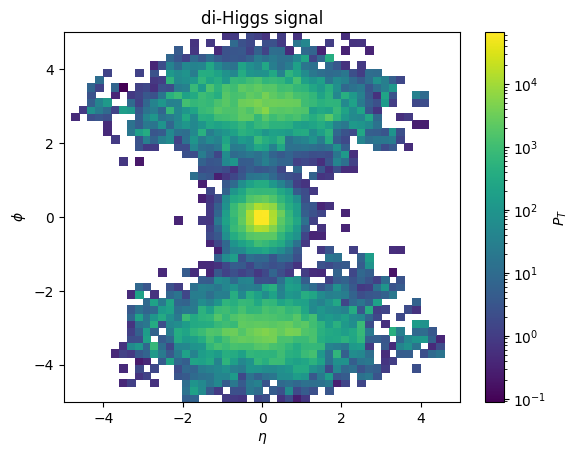

In [7]:
##### select only fat jet >=2 #####

events = Fat_Jet_selection(events)
print("There are", len(events), "signal events survive with originally 10000 events.")

PT_figure_total = np.zeros([grid_num,grid_num])
for i in range(1000):
    PT_figure_total = PT_figure_total + PT_generator(events[i])

pcm = plt.pcolormesh(xedges, yedges, PT_figure_total, norm=LogNorm())
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.title("di-Higgs signal")
plt.show()

In [8]:
'''

##### set signal event content #####

events = [sig_file["Delphes;1"]["Particle.Status"].array(),
        sig_file["Delphes;1"]["Particle.M1"].array(),
        sig_file["Delphes;1"]["Particle.M2"].array(),
        sig_file["Delphes;1"]["Particle.D1"].array(),
        sig_file["Delphes;1"]["Particle.D2"].array(),
        sig_file["Delphes;1"]["Particle.PID"].array(),
        sig_file["Delphes;1"]["Particle.PT"].array(),
        sig_file["Delphes;1"]["Particle.Eta"].array(),
        sig_file["Delphes;1"]["Particle.Phi"].array(),
        sig_file["Delphes;1"]["Particle.Mass"].array()
        ]

##### reshape the signal data #####

events = np.expand_dims(events, axis=-1)
events = events.transpose((1,0,2))
events = np.squeeze(events,axis=(2,))

##### set features #####

_Status, _M1, _M2, _D1, _D2, _PID, _PT, _Eta, _Phi, _Mass = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 
Labels = ["Status", "M1", "M2", "D1", "D2", "PID", "PT", "Eta", "Phi", "Mass"]

##### Show truth record #####

print("Index", "\t","Status", "\t","M1"
    "\t","M2" ,"\t","D1", "\t","D2", "\t","PID", 
    "\t\t","PT" "\t","Eta", "\t\t","Phi", 
    "\t\t","Mass")

event_num = 56
#for j in range(500):
for j in range(len(events[event_num][0])):
    print(j, "\t", events[event_num][_Status][j],"\t\t",
    events[event_num][_M1][j], "\t", events[event_num][_M2][j],
    "\t", events[event_num][_D1][j], "\t", events[event_num][_D2][j],
    "\t", str(events[event_num][_PID][j]).ljust(12, ' '), "\t", round(events[event_num][_PT][j],1),  "\t",
        str(round(events[event_num][_Eta][j],2)).ljust(12, ' ') , "\t",
        str(round(events[event_num][_Phi][j],3)).ljust(12, ' '), "\t",
        round(events[event_num][_Mass][j],3))
        
'''

'\n\n##### set signal event content #####\n\nevents = [sig_file["Delphes;1"]["Particle.Status"].array(),\n        sig_file["Delphes;1"]["Particle.M1"].array(),\n        sig_file["Delphes;1"]["Particle.M2"].array(),\n        sig_file["Delphes;1"]["Particle.D1"].array(),\n        sig_file["Delphes;1"]["Particle.D2"].array(),\n        sig_file["Delphes;1"]["Particle.PID"].array(),\n        sig_file["Delphes;1"]["Particle.PT"].array(),\n        sig_file["Delphes;1"]["Particle.Eta"].array(),\n        sig_file["Delphes;1"]["Particle.Phi"].array(),\n        sig_file["Delphes;1"]["Particle.Mass"].array()\n        ]\n\n##### reshape the signal data #####\n\nevents = np.expand_dims(events, axis=-1)\nevents = events.transpose((1,0,2))\nevents = np.squeeze(events,axis=(2,))\n\n##### set features #####\n\n_Status, _M1, _M2, _D1, _D2, _PID, _PT, _Eta, _Phi, _Mass = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 \nLabels = ["Status", "M1", "M2", "D1", "D2", "PID", "PT", "Eta", "Phi", "Mass"]\n\n##### Show truth record

In [9]:
sig_file["Delphes;1"].show()

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSection         TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSectionError    TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged